In [3]:
import os
import sys

sys.path.append(os.getcwd().replace(f"\classification", ""))

print(f"Working directory: {os.getcwd()}")
for path in sys.path:
    print(path)

Working directory: C:\git\MachineLearning\Project\InteractionsClassification\src\classification
C:\git\MachineLearning\Project\InteractionsClassification\src\classification
C:\Users\luisp\AppData\Local\Programs\Python\Python37\python37.zip
C:\Users\luisp\AppData\Local\Programs\Python\Python37\DLLs
C:\Users\luisp\AppData\Local\Programs\Python\Python37\lib
C:\Users\luisp\AppData\Local\Programs\Python\Python37
C:\git\MachineLearning\Project\InteractionsClassification\venv

C:\git\MachineLearning\Project\InteractionsClassification\venv\lib\site-packages
C:\git\MachineLearning\Project\InteractionsClassification\venv\lib\site-packages\setuptools-40.8.0-py3.7.egg
C:\git\MachineLearning\Project\InteractionsClassification\venv\lib\site-packages\IPython\extensions
C:\Users\luisp\.ipython
C:\Users\luisp\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\192.5728.105\helpers\pydev
C:\Users\luisp\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\192.5728.105\helpers-pro\jupyter_debug
C:\git\Mach

In [4]:
import config_loader
from dataset import dataset_loader
dataset = dataset_loader.load_dataset(config_loader.read_config('../../'))



Configuration READY
Creating dataset from STRING...
Creating features...
Features READY
Creating targets...
Reading Reactome unique interactions...
Reactome interactions READY


In [6]:
dataset['features'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069647 entries, (P60953, O43157) to (P60983, Q9H568)
Data columns (total 7 columns):
score_binding_mode       1069647 non-null float64
score_reaction_mode      1069647 non-null float64
score_catalysis_mode     1069647 non-null float64
score_activation_mode    1069647 non-null float64
score_inhibition_mode    1069647 non-null float64
score_ptmod_mode         1069647 non-null float64
score_expression_mode    1069647 non-null float64
dtypes: float64(7)
memory usage: 65.3+ MB


In [5]:
dataset['features'].describe()

,score_binding_mode,score_reaction_mode,score_catalysis_mode,score_activation_mode,score_inhibition_mode,score_ptmod_mode,score_expression_mode
count,1.069647e+06,1.069647e+06,1.069647e+06,1.069647e+06,1.069647e+06,1.069647e+06,1.069647e+06
mean,3.358081e+02,3.773515e+02,3.230828e+02,7.885636e+01,2.590425e+01,1.740899e+01,8.468482e+00
std,3.739523e+02,4.178914e+02,4.088326e+02,2.250054e+02,1.347490e+02,9.472745e+01,6.087004e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.810000e+02,1.670000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.100000e+02,9.000000e+02,9.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.960000e+02,9.760000e+02,9.760000e+02,9.910000e+02,9.650000e+02,9.810000e+02,8.790000e+02


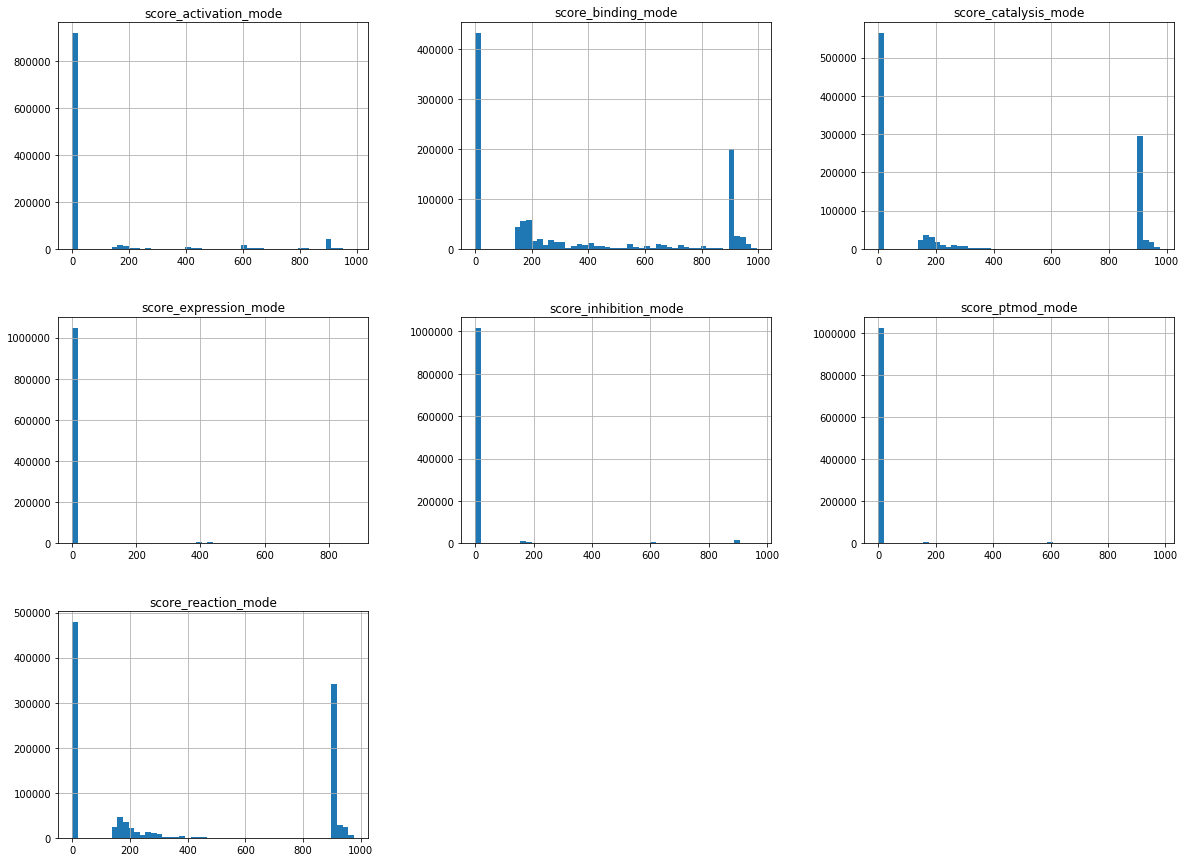

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset['features'].hist(bins=50, figsize=(20,15))
plt.show()

# Looks like the most promising features are: binding, catalysis and reaction mode.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D938D61388>,
      dtype=object)

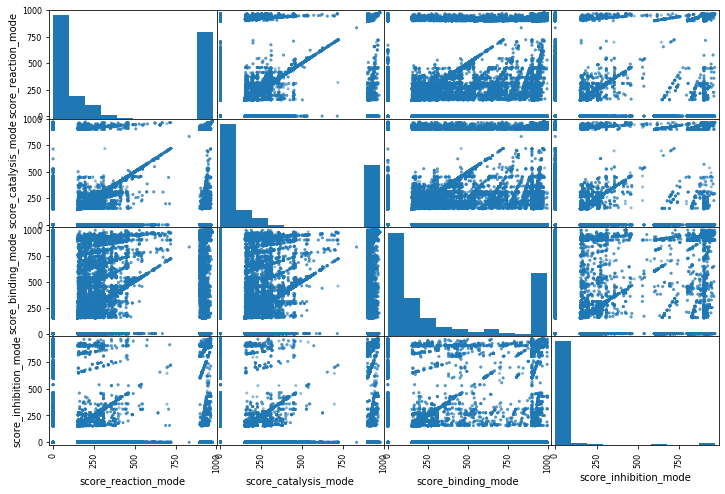

In [8]:
from pandas.plotting import scatter_matrix
attributes = ['score_reaction_mode', 'score_catalysis_mode', 'score_binding_mode', 'score_inhibition_mode']
scatter_matrix(dataset['features'][attributes], figsize=(12, 8))
